Build a regression model. And Provide model output and an interpretation of the results. 
I combined the two parts together buils a regression model and interpret the results.

In [253]:
""" 
Problem Statement:
City bikes company offers a bike sharing services in which bikes 
are made available for shared use to individuals on a short term 
basis for a price or free. 
Many bike share systems allow people to borrow a bike from 
a "dock" which is usually computer-controlled wherein the user 
enters the payment information, and the system unlocks it. 
This bike can then be returned to another dock belonging to 
the same system.

In this part of the project we will build the reggresion model
for this system and interpret the results using statistical coeffients.

The data
We extract the data from citybikes.es (Look at part one). 
And from these data, the bike stations data for "New York" city 
in USA were chosen and extract. 
The file is called NYC_stations.csv
It is converted from json format to csv format.
"""

' \nProblem Statement:\nCity bikes company offers a bike sharing services in which bikes \nare made available for shared use to individuals on a short term \nbasis for a price or free. \nMany bike share systems allow people to borrow a bike from \na "dock" which is usually computer-controlled wherein the user \nenters the payment information, and the system unlocks it. \nThis bike can then be returned to another dock belonging to \nthe same system.\n\nIn this part of the project we will build the reggresion model\nfor this system and interpret the results using statistical coeffients.\n\nThe data\nWe extract the data from citybikes.es (Look at part one). \nAnd from these data, the bike stations data for "New York" city \nin USA were chosen and extract. \nThe file is called NYC_stations.csv\nIt is converted from json format to csv format.\n'

In [254]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [255]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [256]:
bike = pd.DataFrame(pd.read_csv("B:/Week3/Project2/NYC_stations.csv"))

In [257]:
# Check the head of the dataset
bike.head()

,empty_slots,extra/ebikes,extra/has_ebikes,extra/last_updated,extra/payment/0,extra/payment/1,extra/payment-terminal,extra/renting,extra/returning,extra/slots,extra/uid,free_bikes,id,latitude,longitude,name,timestamp
0,17,4,True,1682399328,key,creditcard,True,1,1,39,66de099d-0aca-11e7-82f6-3863bb44ef7c,17,46a983722ee1f51813a6a3eb6534a6e4,40.795000,-73.964500,W 100 St & Manhattan Ave,2023-04-25T05:09:37.498000Z
1,71,0,True,1682399257,key,creditcard,True,1,1,81,b94cc90e-9ca2-4471-8371-23be051e0157,0,81872dcff5f0e5f1e042aafcc0bab6fd,40.766741,-73.979069,7 Ave & Central Park South,2023-04-25T05:09:37.191000Z
2,13,3,True,1682399292,key,creditcard,True,1,1,24,a2f71eea-05a2-4fe7-99ab-f74535c880ae,9,1ce1f825efba7112c62e0b05624fa501,40.676368,-73.952918,Bedford Ave & Bergen St,2023-04-25T05:09:36.665000Z
3,19,0,True,1682399333,key,creditcard,True,1,1,27,9a40cb60-6ede-4c9e-9d64-dc55cae57f31,0,75a634e2473d7e3abf789c09c44fdf26,40.751047,-73.937970,28 St & 41 Ave,2023-04-25T05:09:36.315000Z
4,9,0,True,1682399241,key,creditcard,True,1,1,37,46bdd925-fb6c-4654-85d8-e0db4da62abf,21,fdb4831d3335a9aea380117ea4f4b81a,40.801694,-73.957145,Frederick Douglass Blvd & W 112 St,2023-04-25T05:09:37.763000Z


In [258]:
# Check the descriptive information
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   empty_slots             1888 non-null   int64  
 1   extra/ebikes            1888 non-null   int64  
 2   extra/has_ebikes        1888 non-null   bool   
 3   extra/last_updated      1888 non-null   int64  
 4   extra/payment/0         1888 non-null   object 
 5   extra/payment/1         1888 non-null   object 
 6   extra/payment-terminal  1888 non-null   bool   
 7   extra/renting           1888 non-null   int64  
 8   extra/returning         1888 non-null   int64  
 9   extra/slots             1888 non-null   int64  
 10  extra/uid               1888 non-null   object 
 11  free_bikes              1888 non-null   int64  
 12  id                      1888 non-null   object 
 13  latitude                1888 non-null   float64
 14  longitude               1888 non-null   

In [259]:
bike.describe()

,empty_slots,extra/ebikes,extra/last_updated,extra/renting,extra/returning,extra/slots,free_bikes,latitude,longitude
count,1888.000000,1888.000000,1.888000e+03,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,15.645657,1.578390,1.682399e+09,0.999470,0.999470,31.636123,13.385064,40.745145,-73.954679
std,14.402790,2.251349,3.292982e+01,0.023014,0.023014,16.489354,14.635169,0.059667,0.040297
min,0.000000,0.000000,1.682399e+09,0.000000,0.000000,3.000000,0.000000,40.633385,-74.086701
25%,5.000000,0.000000,1.682399e+09,1.000000,1.000000,21.000000,2.000000,40.698988,-73.985919
50%,14.000000,1.000000,1.682399e+09,1.000000,1.000000,25.000000,8.000000,40.738071,-73.950463
75%,20.000000,2.000000,1.682399e+09,1.000000,1.000000,37.000000,19.000000,40.786194,-73.920305
max,108.000000,24.000000,1.682399e+09,1.000000,1.000000,123.000000,99.000000,40.882260,-73.881450


In [260]:
# Check the shape of df

print(bike.shape)

(1888, 17)


In [261]:
"""
Finding :
Dataset has 1888 rows and 17 columns.

The Dataset is mix: float, integer, bool, object types.

Looking at the data, there seems to be some fields that are categorical in nature, 
but in integer/float type.

We will analyse and finalize whether to convert them to categorical or treat as integer.
"""

'\nFinding :\nDataset has 1888 rows and 17 columns.\n\nThe Dataset is mix: float, integer, bool, object types.\n\nLooking at the data, there seems to be some fields that are categorical in nature, \nbut in integer/float type.\n\nWe will analyse and finalize whether to convert them to categorical or treat as integer.\n'

In [262]:
# DATA QUALITY CHECK
# Check for NULL/MISSING values

In [263]:
# percentage of missing values in each column
round(100*(bike.isnull().sum()/len(bike)), 2).sort_values(ascending=False)

empty_slots               0.0
extra/slots               0.0
name                      0.0
longitude                 0.0
latitude                  0.0
id                        0.0
free_bikes                0.0
extra/uid                 0.0
extra/returning           0.0
extra/ebikes              0.0
extra/renting             0.0
extra/payment-terminal    0.0
extra/payment/1           0.0
extra/payment/0           0.0
extra/last_updated        0.0
extra/has_ebikes          0.0
timestamp                 0.0
dtype: float64

In [264]:
# row-wise null count percentage
round((bike.isnull().sum(axis=1)/len(bike))*100,2).sort_values(ascending=False)

0       0.0
1254    0.0
1266    0.0
1265    0.0
1264    0.0
       ... 
625     0.0
624     0.0
623     0.0
622     0.0
1887    0.0
Length: 1888, dtype: float64

In [265]:
# Finding
# There are no missing / Null values either in columns or rows

In [266]:
# Duplicate Check
bike_dup = bike.copy()

# Checking for duplicates and dropping the entire duplicate row if any
bike_dup.drop_duplicates(subset=None, inplace=True)

In [267]:
bike_dup.shape

(1888, 17)

In [268]:
bike.shape

(1888, 17)

In [269]:
"""
Insights
The shape after running the drop duplicate command is same as the original dataframe.

Hence we can conclude that there were zero duplicate values in the dataset.
"""

'\nInsights\nThe shape after running the drop duplicate command is same as the original dataframe.\n\nHence we can conclude that there were zero duplicate values in the dataset.\n'

In [270]:
# Data Cleaning
# Checking value_counts() for entire dataframe.

# This will help to identify any Unknow/Junk values present in the dataset.

In [271]:
#Create a copy of the  dataframe 

#as this will have unique values, and donot make sense to do a value count on it.

bike_dummy=bike.iloc[:,0:16]

In [272]:
for col in bike_dummy:
    print(bike_dummy[col].value_counts(ascending=False), '\n\n\n')

0      147
14      88
2       86
16      84
17      83
      ... 
49       1
74       1
60       1
61       1
108      1
Name: empty_slots, Length: 82, dtype: int64 



0     767
1     456
2     257
3     141
4      99
5      61
6      34
7      23
8      23
9       7
10      5
16      4
12      3
11      2
14      2
15      2
20      1
24      1
Name: extra/ebikes, dtype: int64 



True    1888
Name: extra/has_ebikes, dtype: int64 



1682399356    29
1682399355    29
1682399350    28
1682399301    27
1682399324    27
              ..
1682399369     1
1682399235     1
1682399366     1
1682399362     1
1682399370     1
Name: extra/last_updated, Length: 134, dtype: int64 



key    1888
Name: extra/payment/0, dtype: int64 



creditcard    1888
Name: extra/payment/1, dtype: int64 



True    1888
Name: extra/payment-terminal, dtype: int64 



1    1887
0       1
Name: extra/renting, dtype: int64 



1    1887
0       1
Name: extra/returning, dtype: int64 



19     263
21     169
23    

In [273]:
# Insights
# There seems to be no Junk/Unknown values in the entire dataset.

In [274]:
# Removing redundant & unwanted columns
"""
Based on the high level look at the data and the data 
dictionary, the following variables can be removed from 
further analysis:
Which keeps only numbers

'extra/has_ebikes', 'extra/payment-terminal', 'extra/uid', 'id', 'name',  'timestamp'

We will save the new dataframe as bike_new, so that the original dataset is preserved 
for any future analysis/validation
"""

"\nBased on the high level look at the data and the data \ndictionary, the following variables can be removed from \nfurther analysis:\nWhich keeps only numbers\n\n'extra/has_ebikes', 'extra/payment-terminal', 'extra/uid', 'id', 'name',  'timestamp'\n\nWe will save the new dataframe as bike_new, so that the original dataset is preserved \nfor any future analysis/validation\n"

In [275]:
bike.columns

Index(['empty_slots', 'extra/ebikes', 'extra/has_ebikes', 'extra/last_updated',
       'extra/payment/0', 'extra/payment/1', 'extra/payment-terminal',
       'extra/renting', 'extra/returning', 'extra/slots', 'extra/uid',
       'free_bikes', 'id', 'latitude', 'longitude', 'name', 'timestamp'],
      dtype='object')

In [276]:
bike_new=bike[['empty_slots', 'extra/ebikes', 'extra/last_updated',
       'extra/renting', 'extra/returning', 'extra/slots',
       'free_bikes', 'latitude', 'longitude']]

In [277]:
bike_new.head()

,empty_slots,extra/ebikes,extra/last_updated,extra/renting,extra/returning,extra/slots,free_bikes,latitude,longitude
0,17,4,1682399328,1,1,39,17,40.795000,-73.964500
1,71,0,1682399257,1,1,81,0,40.766741,-73.979069
2,13,3,1682399292,1,1,24,9,40.676368,-73.952918
3,19,0,1682399333,1,1,27,0,40.751047,-73.937970
4,9,0,1682399241,1,1,37,21,40.801694,-73.957145


In [278]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   empty_slots         1888 non-null   int64  
 1   extra/ebikes        1888 non-null   int64  
 2   extra/last_updated  1888 non-null   int64  
 3   extra/renting       1888 non-null   int64  
 4   extra/returning     1888 non-null   int64  
 5   extra/slots         1888 non-null   int64  
 6   free_bikes          1888 non-null   int64  
 7   latitude            1888 non-null   float64
 8   longitude           1888 non-null   float64
dtypes: float64(2), int64(7)
memory usage: 132.9 KB


In [279]:
bike_new.shape

(1888, 9)

In [280]:
# Find out the correlation betweem variables.
bike_new.corr()

,empty_slots,extra/ebikes,extra/last_updated,extra/renting,extra/returning,extra/slots,free_bikes,latitude,longitude
empty_slots,1.000000,-0.203050,-0.001660,0.025014,0.025014,0.545068,-0.409451,0.149640,-0.024553
extra/ebikes,-0.203050,1.000000,0.031629,0.016144,0.016144,0.022960,0.216560,0.013481,-0.073403
extra/last_updated,-0.001660,0.031629,1.000000,-0.026436,-0.026436,-0.010864,-0.014070,0.016445,-0.062493
extra/renting,0.025014,0.016144,-0.026436,1.000000,1.000000,0.003681,0.021060,0.001473,-0.009531
extra/returning,0.025014,0.016144,-0.026436,1.000000,1.000000,0.003681,0.021060,0.001473,-0.009531
extra/slots,0.545068,0.022960,-0.010864,0.003681,0.003681,1.000000,0.522469,-0.073265,-0.401578
free_bikes,-0.409451,0.216560,-0.014070,0.021060,0.021060,0.522469,1.000000,-0.267537,-0.410003
latitude,0.149640,0.013481,0.016445,0.001473,0.001473,-0.073265,-0.267537,1.000000,0.453841
longitude,-0.024553,-0.073403,-0.062493,-0.009531,-0.009531,-0.401578,-0.410003,0.453841,1.000000


In [281]:
    """
    - The Correlation ranges from -1 to +1. 
    - Values closer to zero means there is no linear trend between the two variables. 
    - The close to 1 the correlation is the more positively correlatedand stronger  
        relationship between the variables. 
    - A correlation closer to -1 is similar, but instead of both increasing 
        one variable will decrease as the other increases. 
        
    Accordint to the table there is no strong correlations between variables. 
    There are three variables maybe need intesive discussing to prove if there is 
    real model will be build. 
        - empty_slots
        - extra/slots
        - free_bikes
    """

'\n- The Correlation ranges from -1 to +1. \n- Values closer to zero means there is no linear trend between the two variables. \n- The close to 1 the correlation is the more positively correlatedand stronger  \n    relationship between the variables. \n- A correlation closer to -1 is similar, but instead of both increasing \n    one variable will decrease as the other increases. \n    \nAccordint to the table there is no strong correlations between variables. \nThere are three variables maybe need intesive discussing to prove if there is \nreal model will be build. \n    - empty_slots\n    - extra/slots\n    - free_bikes\n'

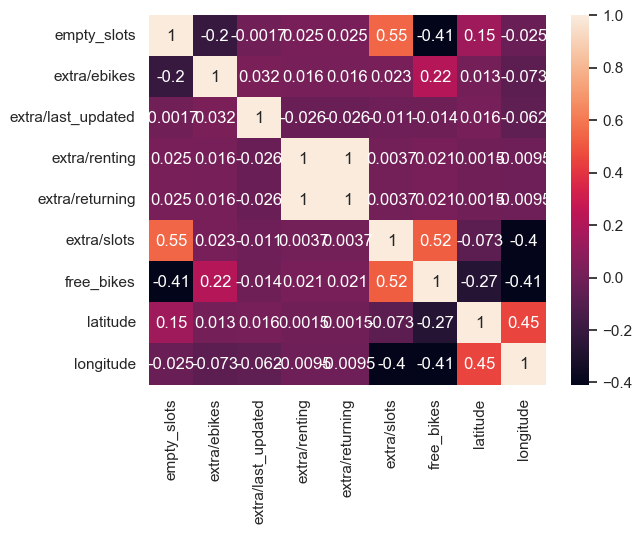

In [282]:
sns.heatmap(bike_new.corr(),annot=True)

In [283]:
    """
    A heat map is a two-dimensional representation of data in which values are represented
    by colors. Correlation Heat map is a two dimensional plot of the amount of correlation 
    (measure of dependence) between variables represented by colors. The varying intensity 
    of color represents the measure of correlation. Correlation is a measure of linear 
    relationship between two variables. Correlation between two variables can also be 
    determined using scatter plot between these two variables. 
    Correlation values ranges from -1 to +1.
    
    From this heat map we can notice the extra/slots variable has average relation with 
    empty/slots and free_bikes wheareas no relation between empty/slots an free_bikes.
    
    That means both variables empty/slots and free_bike are independent variables and 
    extra/slots variable are dependent.
    
    """

'\nA heat map is a two-dimensional representation of data in which values are represented\nby colors. Correlation Heat map is a two dimensional plot of the amount of correlation \n(measure of dependence) between variables represented by colors. The varying intensity \nof color represents the measure of correlation. Correlation is a measure of linear \nrelationship between two variables. Correlation between two variables can also be \ndetermined using scatter plot between these two variables. \nCorrelation values ranges from -1 to +1.\n\nFrom this heat map we can notice the extra/slots variable has average relation with \nempty/slots and free_bikes wheareas no relation between empty/slots an free_bikes.\n\nThat means both variables empty/slots and free_bike are independent variables and \nextra/slots variable are dependent.\n\n'

In [284]:
# Showing the relation correlation of extra/slots variable with all other variables.
corr_matrix = bike_new.corr()
corr_matrix["extra/slots"].sort_values(ascending=False)

extra/slots           1.000000
empty_slots           0.545068
free_bikes            0.522469
extra/ebikes          0.022960
extra/renting         0.003681
extra/returning       0.003681
extra/last_updated   -0.010864
latitude             -0.073265
longitude            -0.401578
Name: extra/slots, dtype: float64

In [285]:
# Showing the relation correlation of empty_slots variable with all other variables.
corr_matrix = bike_new.corr()
corr_matrix["empty_slots"].sort_values(ascending=False)

empty_slots           1.000000
extra/slots           0.545068
latitude              0.149640
extra/renting         0.025014
extra/returning       0.025014
extra/last_updated   -0.001660
longitude            -0.024553
extra/ebikes         -0.203050
free_bikes           -0.409451
Name: empty_slots, dtype: float64

In [286]:
# Showing the relation correlation of free_bikes variable with all other variables.
corr_matrix = bike_new.corr()
corr_matrix["free_bikes"].sort_values(ascending=False)

free_bikes            1.000000
extra/slots           0.522469
extra/ebikes          0.216560
extra/renting         0.021060
extra/returning       0.021060
extra/last_updated   -0.014070
latitude             -0.267537
empty_slots          -0.409451
longitude            -0.410003
Name: free_bikes, dtype: float64

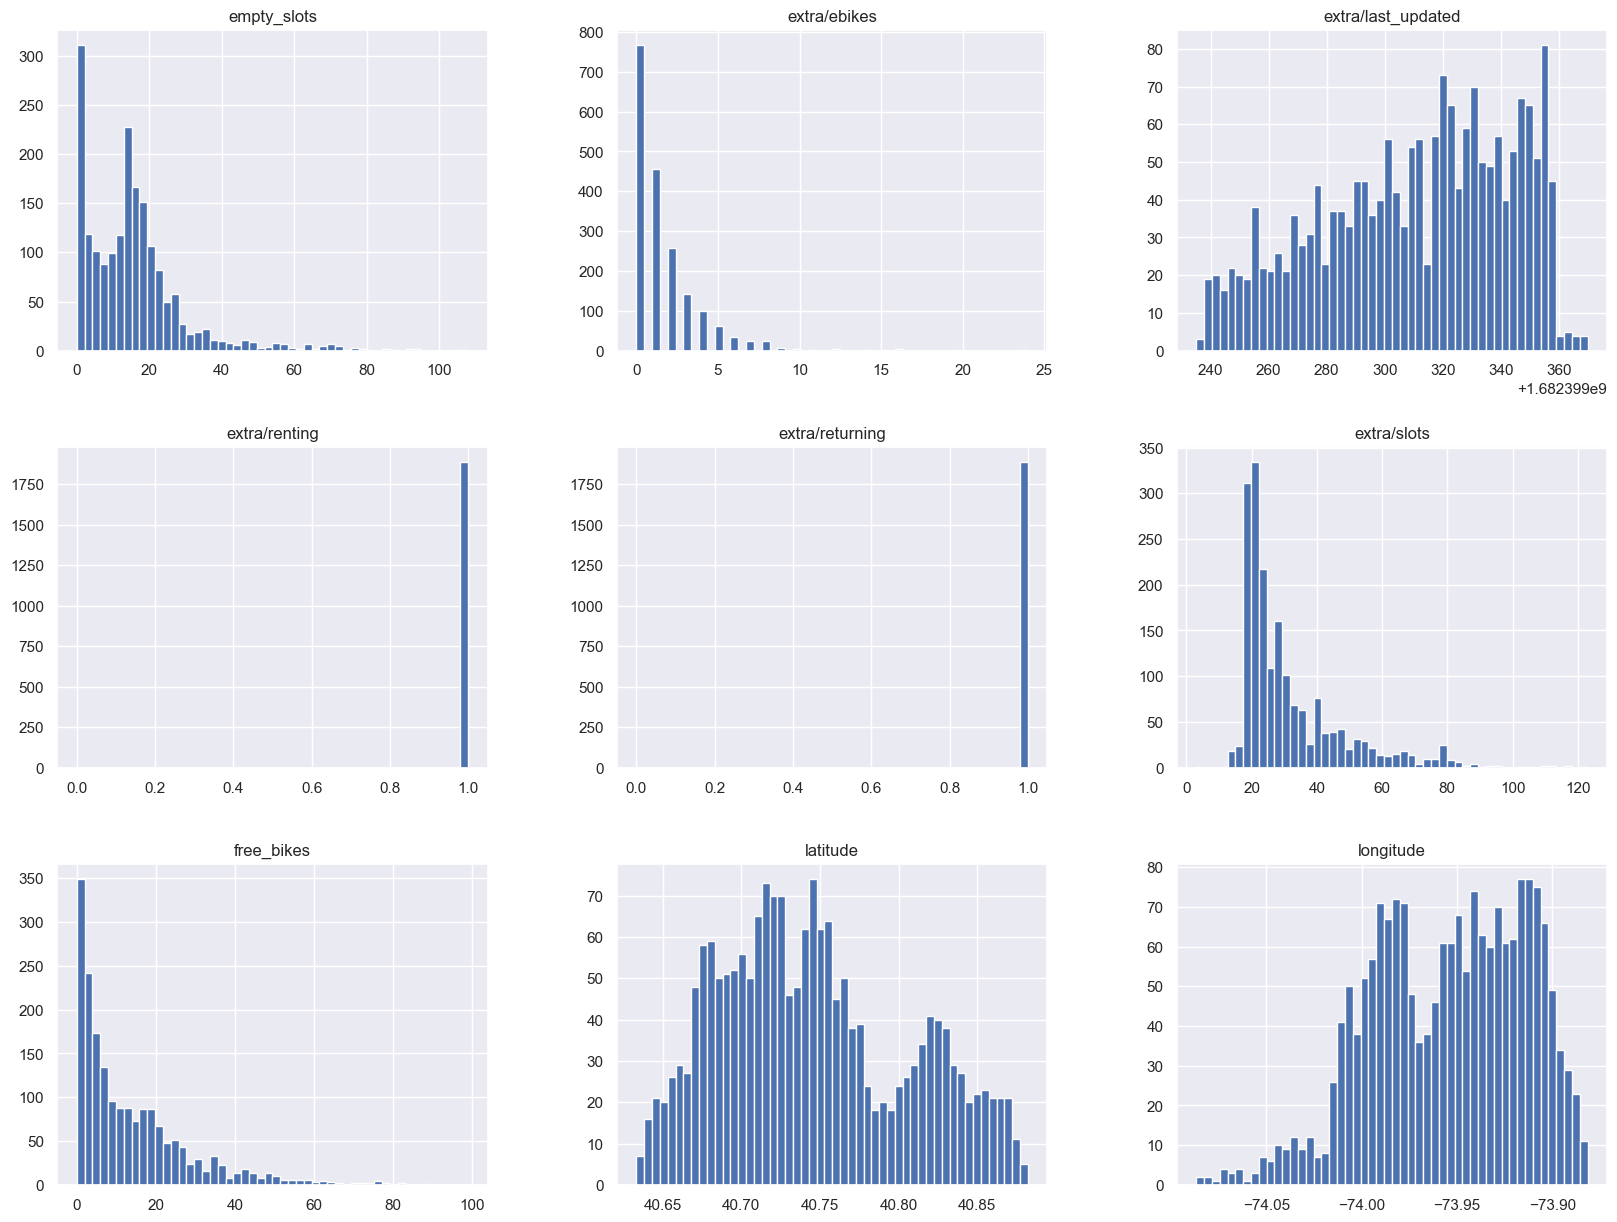

In [287]:
%matplotlib inline
import matplotlib.pyplot as plt
bike_new.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [288]:
"""
These charts show the real relatin between variables are not linear regresion. The relation
function is kind of distribution.
"""

'\nThese charts show the real relatin between variables are not linear regresion. The relation\nfunction is kind of distribution.\n'

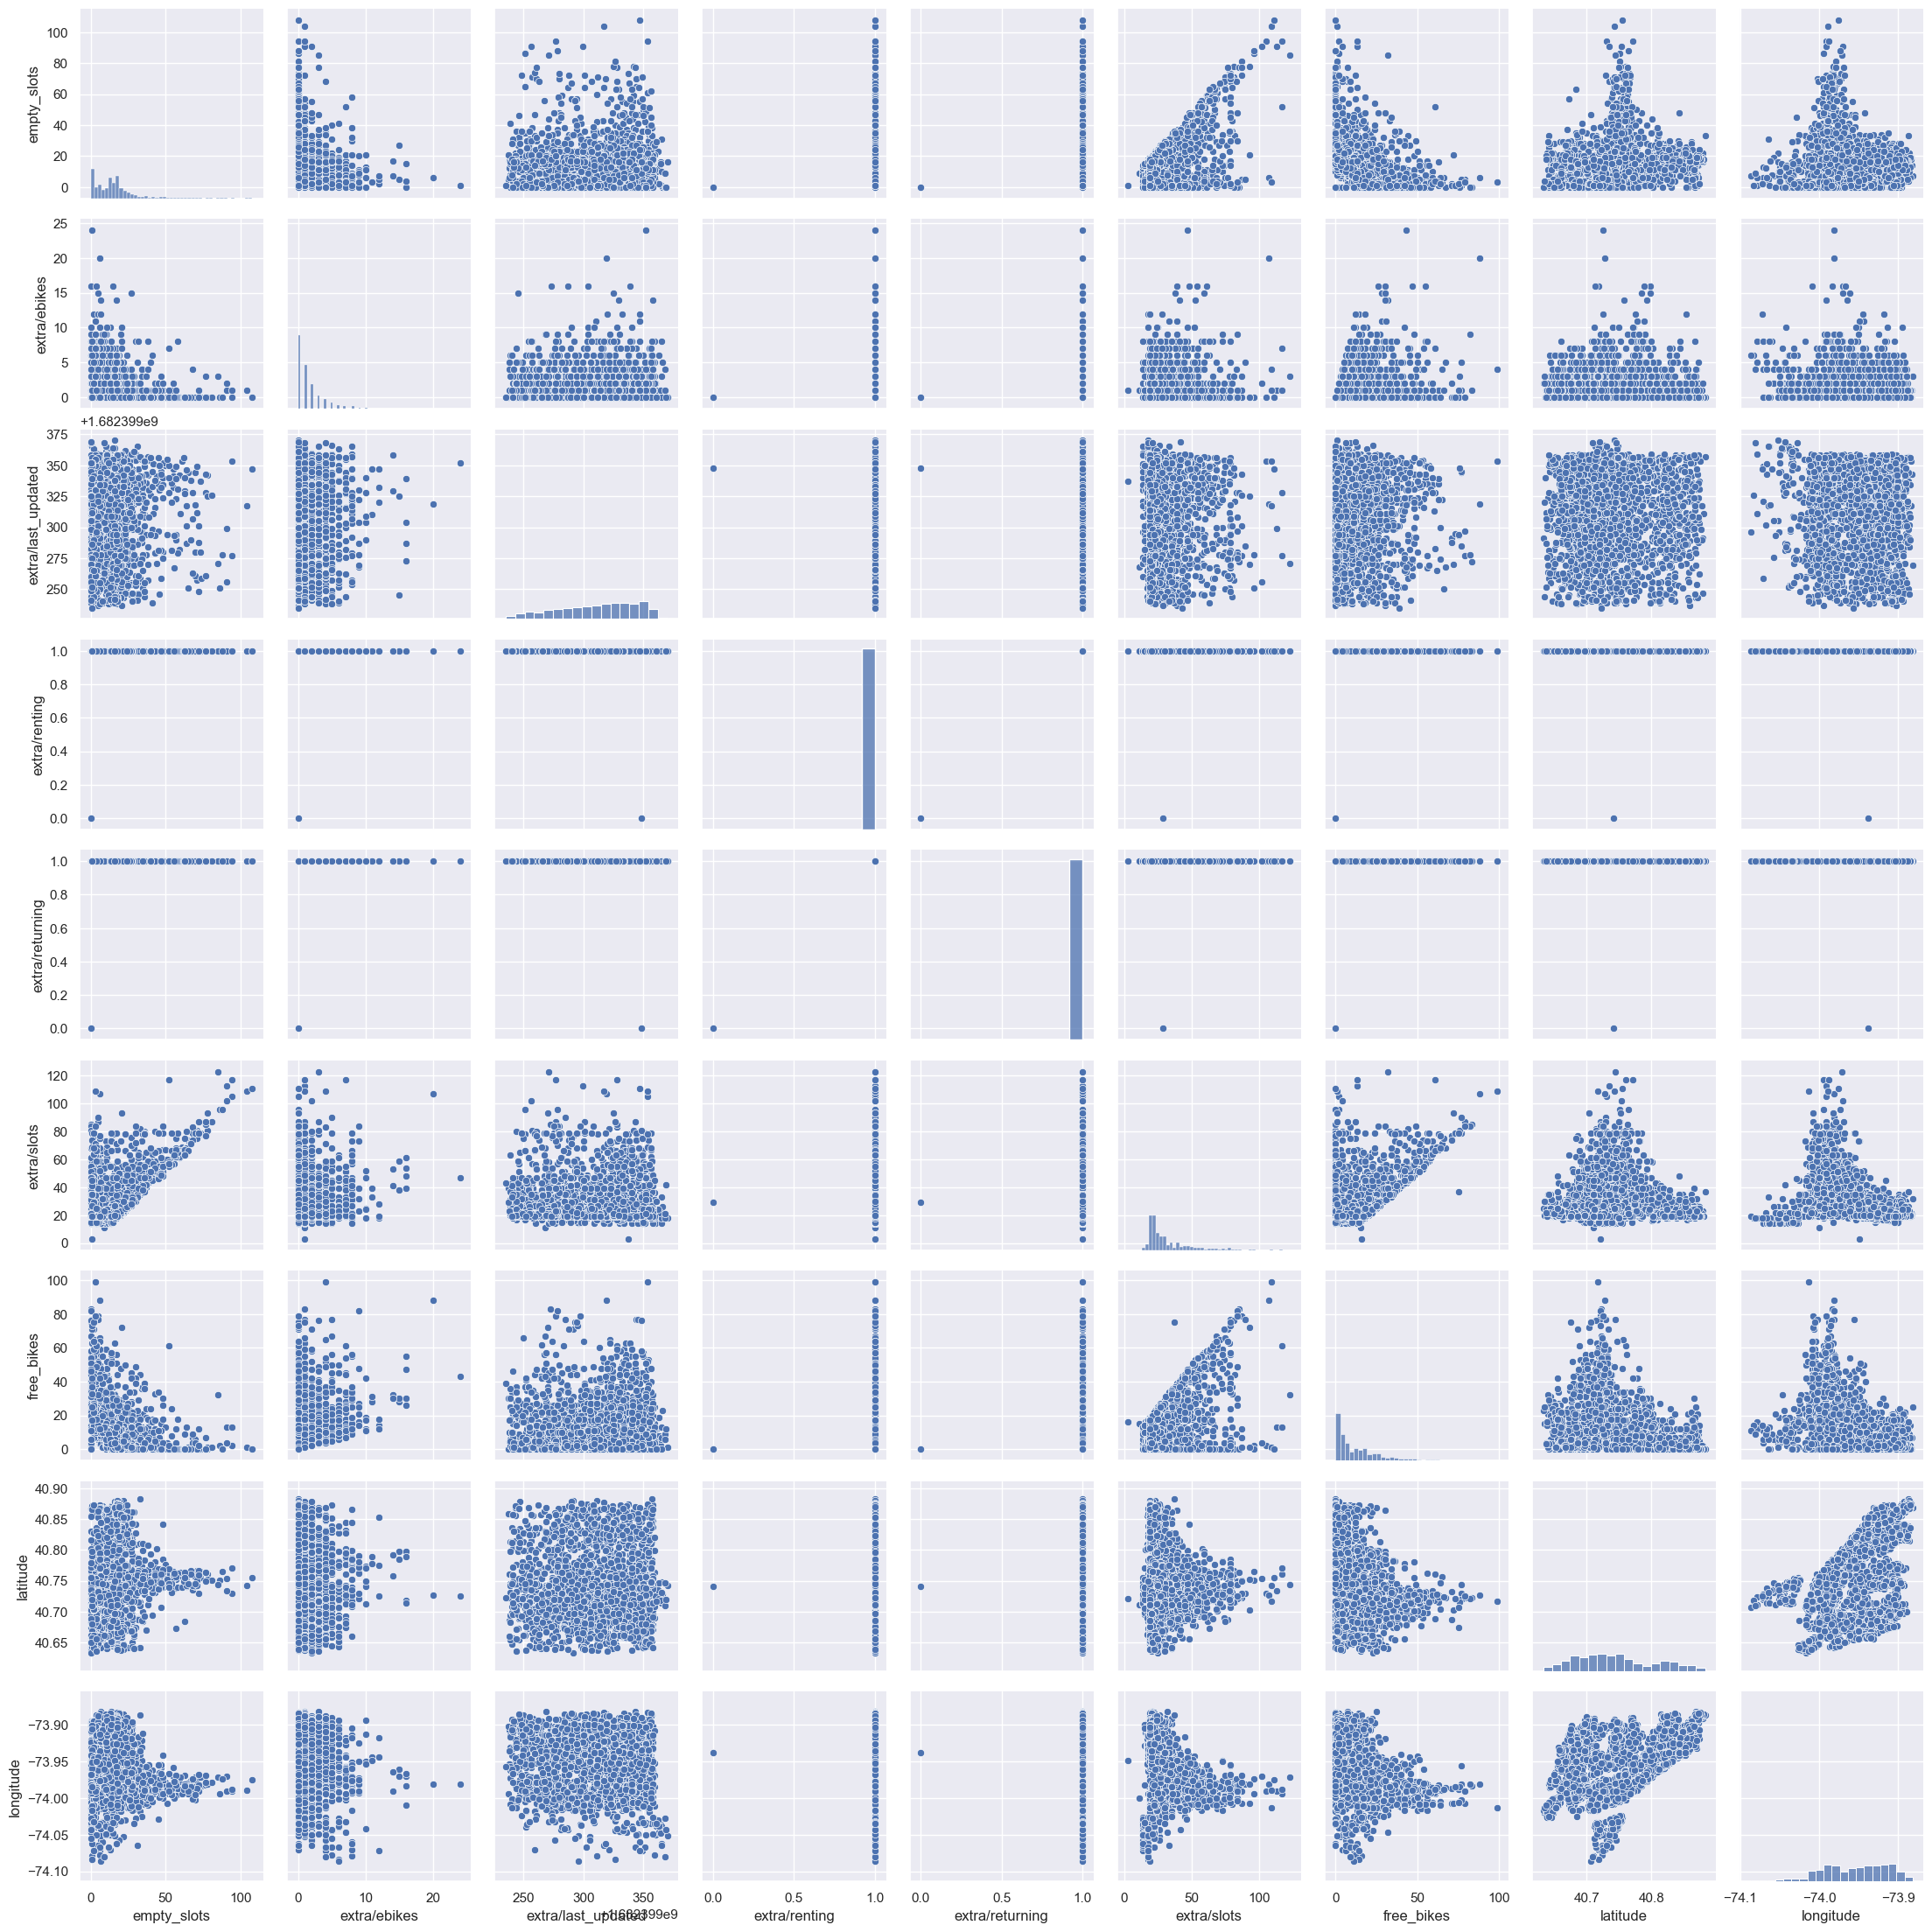

In [289]:
sns.pairplot(bike_new)

In [290]:
"""
These diagrams show kind of data spread with no real relation and the sharp line prove 
there are kind of initial conditions. Whereas the sharp vertical and horizontal lines as
a result of the relation between extra/renting and extr/rerenting which considered as a one 
variable correlated with itself.
""" 

'\nThese diagrams show kind of data spread with no real relation and the sharp line prove \nthere are kind of initial conditions. Whereas the sharp vertical and horizontal lines as\na result of the relation between extra/renting and extr/rerenting which considered as a one \nvariable correlated with itself.\n'

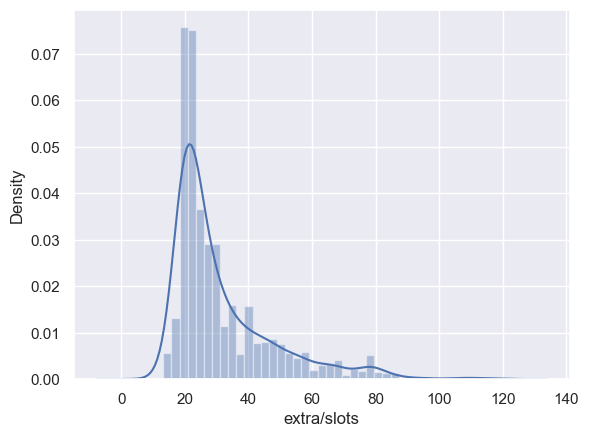

In [291]:
sns.distplot(bike_new["extra/slots"],kde=True)

In [292]:
# The density vs extra/slots prove the relation between these two variables is a kind of 
# distrbution function

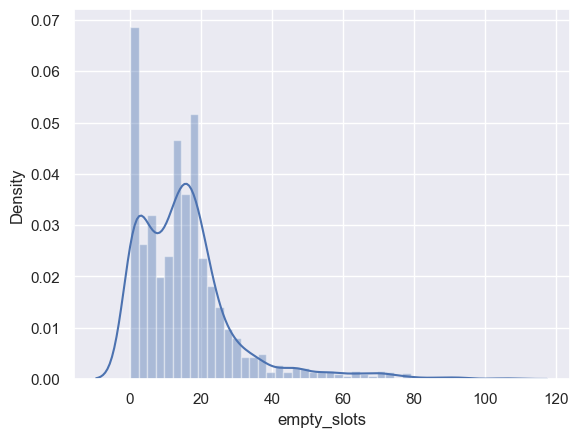

In [293]:
sns.distplot(bike_new["empty_slots"],kde=True)

In [294]:
# Forward Selection
# Build all models that contain only one independent variable.

In [295]:
y = bike_new['extra/slots']

# X=[]
# for column in car_df.columns[1:]:
#     X.append(sm.add_constant(car_df[column]))

#Create a model for each indep. variable
#list of X's (with constants)
X = [sm.add_constant(bike_new[column]) for column in bike_new.columns[1:]] 
X[0]

,const,extra/ebikes
0,1.0,4
1,1.0,0
2,1.0,3
3,1.0,0
4,1.0,0
...,...,...
1883,1.0,0
1884,1.0,3
1885,1.0,0
1886,1.0,0


In [296]:
Models = [sm.OLS(y,x) for x in X] #list of models
Results = [model.fit() for model in Models] #list of results
Adj_Rsquared = [results.rsquared_adj for results in Results] #list of rsquared
Pval = [results.pvalues for results in Results] #list of p-values

In [297]:
for i in range(len(Adj_Rsquared)):
     print(f'adj_R2: {Adj_Rsquared[i]:.3f}, P-values: {*Pval[i],}, column: {bike_new.columns[i+1]}')

adj_R2: -0.000, P-values: (0.0, 0.31872155878345243), column: extra/ebikes
adj_R2: -0.000, P-values: (0.0, 0.0), column: extra/last_updated
adj_R2: -0.001, P-values: (0.07886608166166058, 0.8730012034041901), column: extra/renting
adj_R2: -0.001, P-values: (0.07886608166166058, 0.8730012034041901), column: extra/returning
adj_R2: 1.000, P-values: (0.1665636693422754, 0.0), column: extra/slots
adj_R2: 0.273, P-values: (0.0, 9.708286326834095e-133), column: free_bikes
adj_R2: 0.005, P-values: (0.0009415496007768672, 0.0014444266322687033), column: latitude
adj_R2: 0.161, P-values: (9.592446390559038e-74, 4.339192015156863e-74), column: longitude


In [298]:
# From this output, we can see that the model with 'extra/slots' had the highest 
# adj. R-squared value = 1.000. and the second one is "free_bikes" = 0.273 . As analyzing from the begning.
# It ranges from 0 to 1. For example, if the R-squared is 0.9, it indicates that 90% of 
# the variation in the output variables are explained by the input variables. 
# Generally speaking, a higher R-squared indicates a better fit for the model.
# 
# Now let's try all models that consist of 'extra/slots' and another variable.

In [299]:
remaining_var = bike_new.drop(['extra/slots', 'free_bikes'], axis=1)
remaining_var.head()

,empty_slots,extra/ebikes,extra/last_updated,extra/renting,extra/returning,latitude,longitude
0,17,4,1682399328,1,1,40.795000,-73.964500
1,71,0,1682399257,1,1,40.766741,-73.979069
2,13,3,1682399292,1,1,40.676368,-73.952918
3,19,0,1682399333,1,1,40.751047,-73.937970
4,9,0,1682399241,1,1,40.801694,-73.957145


In [300]:
included_df = bike_new[['extra/slots']]
included_df

,extra/slots
0,39
1,81
2,24
3,27
4,37
...,...
1883,66
1884,20
1885,63
1886,63


In [301]:
X = [sm.add_constant(pd.merge(included_df,remaining_var[column], right_index = True, left_index = True)) for column in remaining_var.columns] 
X[2]

,const,extra/slots,extra/last_updated
0,1.0,39,1682399328
1,1.0,81,1682399257
2,1.0,24,1682399292
3,1.0,27,1682399333
4,1.0,37,1682399241
...,...,...,...
1883,1.0,66,1682399251
1884,1.0,20,1682399329
1885,1.0,63,1682399327
1886,1.0,63,1682399312


In [302]:
Models = [sm.OLS(y,x) for x in X] #list of models
Results = [model.fit() for model in Models] #list of results
Adj_Rsquared = [results.rsquared_adj for results in Results] #list of rsquared
Pval = [results.pvalues for results in Results] #list of list of p-values

for i in range(len(Adj_Rsquared)):
     print(f'adj_R2: {Adj_Rsquared[i]:.3f}, P-values: {*Pval[i],}, column: {remaining_var.columns[i]}')

adj_R2: 1.000, P-values: (7.848364110232717e-12, 0.0, 3.772859308044784e-07), column: empty_slots
adj_R2: 1.000, P-values: (0.49118484055820877, 0.0, 0.1161868224244739), column: extra/ebikes
adj_R2: 1.000, P-values: (0.0, 0.0, 2.568167221256218e-81), column: extra/last_updated
adj_R2: 1.000, P-values: (0.7273420434199485, 0.0, 0.3315338702752164), column: extra/renting
adj_R2: 1.000, P-values: (0.7273420434199485, 0.0, 0.3315338702752164), column: extra/returning
adj_R2: 1.000, P-values: (0.918243382728577, 0.0, 0.9691003511155785), column: latitude
adj_R2: 1.000, P-values: (0.9597261249062465, 0.0, 0.9426521148737717), column: longitude


In [303]:
# It looks like 'extr/slots' with all other variables is  the "best" model. 

In [304]:
#run full model
y = bike_new['extra/slots']
X = bike_new.drop('extra/slots', axis=1)
X = sm.add_constant(X) #adds a column of 1's so the model will contain an intercept

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            extra/slots   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     9623.
Date:                Wed, 26 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:35:55   Log-Likelihood:                -4707.4
No. Observations:                1888   AIC:                             9429.
Df Residuals:                    1881   BIC:                             9468.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.302e-06   1.29

In [305]:
# I'd keep this model. All coefficients have significant p-values with high R-squared: 0.968
# Adj. R-squared: 0.968

# Stretch

How can you turn the regression model into a classification model?

In [306]:
# Let review the main DataFrame
bike_new.head()

,empty_slots,extra/ebikes,extra/last_updated,extra/renting,extra/returning,extra/slots,free_bikes,latitude,longitude
0,17,4,1682399328,1,1,39,17,40.795000,-73.964500
1,71,0,1682399257,1,1,81,0,40.766741,-73.979069
2,13,3,1682399292,1,1,24,9,40.676368,-73.952918
3,19,0,1682399333,1,1,27,0,40.751047,-73.937970
4,9,0,1682399241,1,1,37,21,40.801694,-73.957145


In [307]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   empty_slots         1888 non-null   int64  
 1   extra/ebikes        1888 non-null   int64  
 2   extra/last_updated  1888 non-null   int64  
 3   extra/renting       1888 non-null   int64  
 4   extra/returning     1888 non-null   int64  
 5   extra/slots         1888 non-null   int64  
 6   free_bikes          1888 non-null   int64  
 7   latitude            1888 non-null   float64
 8   longitude           1888 non-null   float64
dtypes: float64(2), int64(7)
memory usage: 132.9 KB


In [308]:
import numpy as np
bike_new['frebik'] = np.where(bike_new['extra/slots']>10, 1, 0)
bike_df = bike_new.drop(['free_bikes'], axis=1)
bike_df.head()

,empty_slots,extra/ebikes,extra/last_updated,extra/renting,extra/returning,extra/slots,latitude,longitude,frebik
0,17,4,1682399328,1,1,39,40.795000,-73.964500,1
1,71,0,1682399257,1,1,81,40.766741,-73.979069,1
2,13,3,1682399292,1,1,24,40.676368,-73.952918,1
3,19,0,1682399333,1,1,27,40.751047,-73.937970,1
4,9,0,1682399241,1,1,37,40.801694,-73.957145,1


In [309]:
y = bike_df['frebik']
X = bike_df.drop(['frebik'], axis=1)
X = sm.add_constant(X) #adds a column of 1's so the model will contain an intercept

model = sm.Logit(y,X)
results = model.fit(method='bfgs')
print(results.summary())

         Current function value: 0.693147
         Iterations: 0
         Function evaluations: 15
         Gradient evaluations: 3
                           Logit Regression Results                           
Dep. Variable:                 frebik   No. Observations:                 1888
Model:                          Logit   Df Residuals:                     1880
Method:                           MLE   Df Model:                            7
Date:                Wed, 26 Apr 2023   Pseudo R-squ.:                  -152.2
Time:                        13:35:56   Log-Likelihood:                -1308.7
converged:                      False   LL-Null:                       -8.5430
Covariance Type:            nonrobust   LLR p-value:                     1.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                       0        nan        nan        nan

In [310]:
y = bike_df['frebik']
X = bike_df.drop(['frebik', 'extra/slots'], axis=1)
X = sm.add_constant(X) #adds a column of 1's so the model will contain an intercept

model = sm.Logit(y,X)
results = model.fit(method='bfgs')
print(results.summary())

         Current function value: 0.693147
         Iterations: 0
         Function evaluations: 15
         Gradient evaluations: 3
                           Logit Regression Results                           
Dep. Variable:                 frebik   No. Observations:                 1888
Model:                          Logit   Df Residuals:                     1881
Method:                           MLE   Df Model:                            6
Date:                Wed, 26 Apr 2023   Pseudo R-squ.:                  -152.2
Time:                        13:35:57   Log-Likelihood:                -1308.7
converged:                      False   LL-Null:                       -8.5430
Covariance Type:            nonrobust   LLR p-value:                     1.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                       0        nan        nan        nan

In [311]:
# I tried to install optomization libraries to fix this problem. Beside that I change
# results = model.fit() to results = model.fit(method='bfgs') to show some results
# If I have time, I'll fix this problem. 
# I think this problem happened because of the large numbers of latitude and longtitude.

# The only step needs to accept this model 
# if p-values are the minemum < 0.05 if not I'll repeat this step and try remove it that from the model.